# 02 : Stock Price Trends Prediction on Data Mining techniques

การทำนายแนวโน้มราคาหลักทรัพย์ผ่านเทคนิควิธีการทำเหมืองข้อมูล

### คำอธิบาย

*   เป็นโปรแกรมที่สร้างวิธีการทำนายแนวโน้มราคาหลักทรัพย์แบบรายวันผ่านเทคนิควิธีการทำเหมืองข้อมูล
*   ตัวแปรที่ใช้ คือ ราคาปิด (Close) และปริมาณซื้อขายรายวัน (Volume)
*   วิธีการทำนายผล ได้แก่ วิธีการวิเคราะห์ทางสถิติ (Statistical Analysis) วิธีจำแนกแบบเบย์อย่างง่าย (Naive Bayes Classifier) และวิธีจำแนกต้นไม้การตัดสินใจ (Decision Tree Classifier)
*   วัดประสิทธิภาพของโมเดลเพื่อศึกษาเปรียบเทียบกับเทคนิควิธีการพื้นฐาน

### ขั้นตอนการศึกษา

*   1) กำหนดชุดข้อมูลและค่าพารามิเตอร์ที่ต้องการศึกษา 
*   2) กำหนดค่าไฮเปอร์พารามิเตอร์บนโมเดลทำนายผลและทำการเทรนโมเดลทั้งหมด (Parameter tuning)
*   3) เปรียบเทียบประสิทธิภาพของโมเดลในการทำนายแนวโน้ม 
*   4) ทำการค้นหาและเลือกค่าพารามิเตอร์ที่ดีที่สุดในการใช้วิเคราะห์และสร้างโมเดลทำนายผล




# 1) Data Collection

1.1) ทำการติดตั้ง Library ที่จำเป็นทั้งหมดในการใช้งาน

In [1]:
# ignore all warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Stock Data Collection Library
# Import from yahoo financial 

!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 9.7 MB/s 
     |████████████████████████████████| 4.0 MB 50.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 110 kB 61.8 MB/s 
     |████████████████████████████████| 128 kB 60.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
# Import similarity distance computation algorithm  
# Dynamic Time Warping (DTW) algorithm  

!pip install dtaidistance
from dtaidistance import dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.1 MB/s 


In [4]:
# Libraries for processing and mining stock data.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [5]:
# Libraries for modeling.

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Libraries for evaluation metrics.

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

1.2) กำหนดชุดข้อมูลและค่าที่เกี่ยวข้องที่ต้องการใช้ศึกษา



*   1) **stock_price** : ชื่อหลักทรัพย์ (ตัวย่อภาษาอังกฤษ) 
*   2) **start_date** : วันที่เริ่มต้นขอชุดข้อมูล (YYYY-MM-DD)
*   3) **end_date** : วันที่สิ้นสุดของชุดข้อมูล (YYYY-MM-DD)
*   4) **interval** : ช่วงกรอบเวลา (Timeframe) หน่วย d เท่ากับ วัน 

In [7]:
# Setting parameters for modeling and evaluating.

# Stock data  
stock_price = 'KBANK.BK'    

# Start Date  
start_date = '2017-11-10'   

# End Date
end_date = '2022-11-11'

# Timeframe of Stock data 
interval = '1d'          

1.3) ดึงชุดข้อมูล

In [8]:
# Import stock data from SET (Thailand)

df = yf.download(tickers=stock_price, start=start_date, end=end_date, interval=interval)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,218.0,220.0,217.0,217.0,190.248138,3365200
2017-11-13,216.0,219.0,215.0,217.0,190.248138,3414400
2017-11-14,218.0,224.0,217.0,224.0,196.385193,4853400
2017-11-15,223.0,223.0,220.0,220.0,192.878311,3879500
2017-11-16,220.0,223.0,220.0,221.0,193.755035,3443400
...,...,...,...,...,...,...
2022-11-04,149.0,149.5,148.0,148.5,148.500000,12164700
2022-11-07,149.0,149.5,148.0,148.0,148.000000,5119300
2022-11-08,149.0,149.5,148.0,148.5,148.500000,5572100


1.4) สำรวจชุดข้อมูลในเบื้องต้น

In [9]:
# Check data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2017-11-10 to 2022-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1214 non-null   float64
 1   High       1214 non-null   float64
 2   Low        1214 non-null   float64
 3   Close      1214 non-null   float64
 4   Adj Close  1214 non-null   float64
 5   Volume     1214 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.4 KB


In [10]:
# Check "close price" column in our dataset (target feature) 
df['Close']

Date
2017-11-10    217.0
2017-11-13    217.0
2017-11-14    224.0
2017-11-15    220.0
2017-11-16    221.0
              ...  
2022-11-04    148.5
2022-11-07    148.0
2022-11-08    148.5
2022-11-09    147.5
2022-11-10    148.0
Name: Close, Length: 1214, dtype: float64

1.5) พล็อตกราฟเพื่อดูกราฟการเคลื่อนที่ของราคาปิดย้อนหลังจนถึงช่วงเวลาปัจจุบันที่ได้ทำการจัดเก็บ

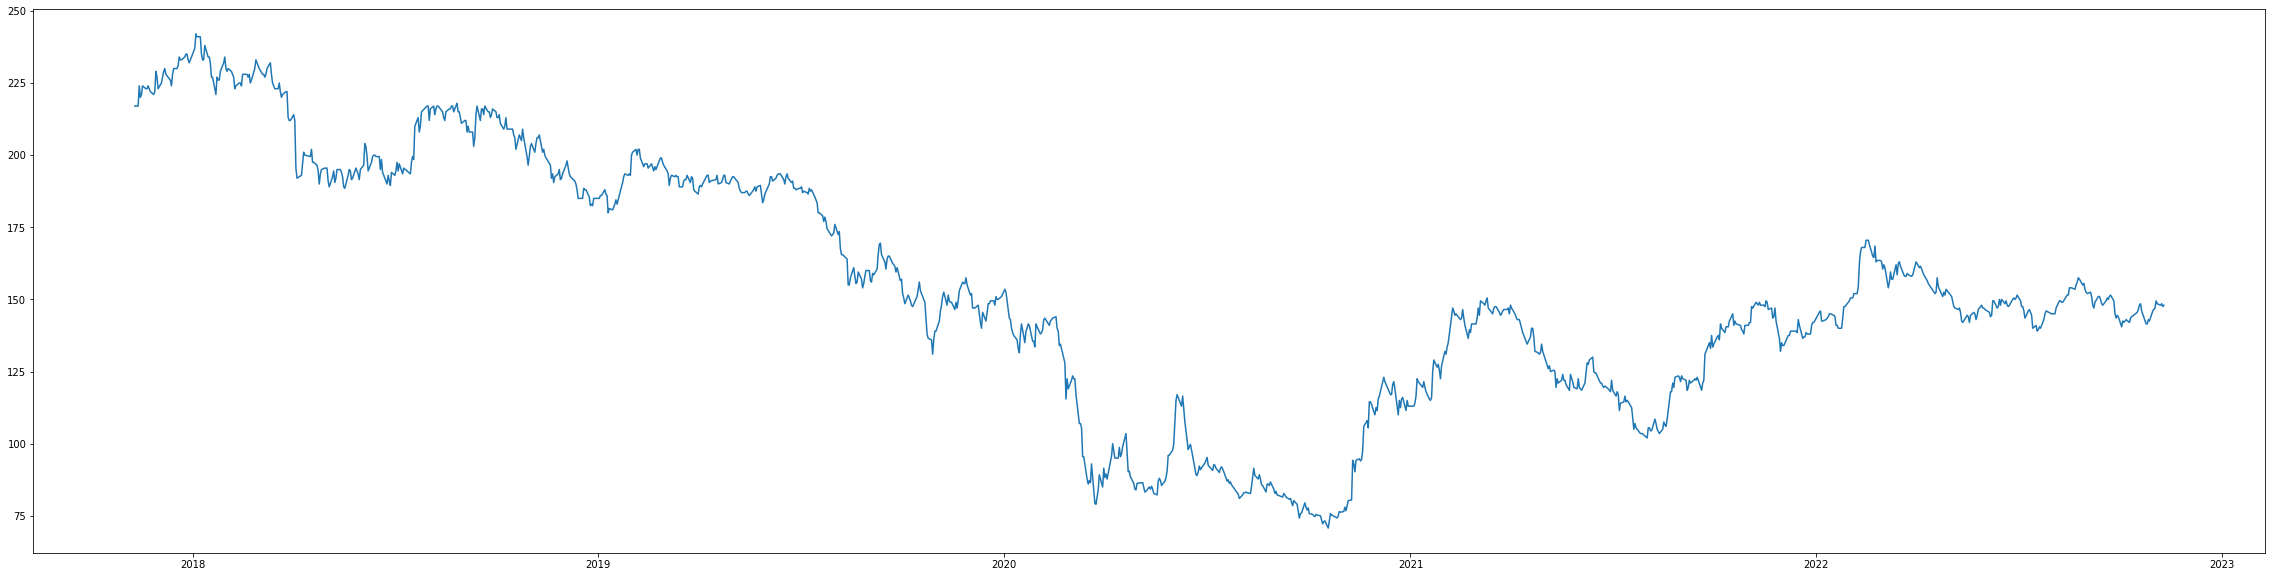

In [11]:
# Plotting stock close price (Line plot) from inital to current date.
# Let's see the volatility of stock market price data.
plt.figure(figsize=(40,10))
plt.plot(df['Close'])

# 2) Data Preprocessing

2.1) สร้างชุดข้อมูลเพื่อจัดเก็บเฉพาะข้อมูลราคาปิด (Close) ซึ่งเป็นตัวแปรที่เราจะใช้ในการศึกษานี้

In [12]:
# Generate a new dataframe that contain only a 'Date' and 'Close price' column.
df_closed_price = df['Close']
df_closed_price = pd.DataFrame(df_closed_price)
df_closed_price.rename(columns = {'Close':'Close price'}, inplace = True)
df_closed_price

,Close price
Date,
2017-11-10,217.0
2017-11-13,217.0
2017-11-14,224.0
2017-11-15,220.0
2017-11-16,221.0
...,...
2022-11-04,148.5
2022-11-07,148.0
2022-11-08,148.5


2.2) สำรวจชุดข้อมูลในเบื้องต้น

In [13]:
# check data information
df_closed_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2017-11-10 to 2022-11-10
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close price  1214 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [14]:
# reset index in dataset 
df_closed_price.reset_index(inplace=True)
df_closed_price

,Date,Close price
0,2017-11-10,217.0
1,2017-11-13,217.0
2,2017-11-14,224.0
3,2017-11-15,220.0
4,2017-11-16,221.0
...,...,...
1209,2022-11-04,148.5
1210,2022-11-07,148.0
1211,2022-11-08,148.5
1212,2022-11-09,147.5


2.3) ปรับขนาดชุดข้อมูล (Data Normalization)

In [15]:
# Using MinMaxScaler function to transform data into scale [0,1].
# Scaling a 'Closr price' column in close price dataset.
scaler = MinMaxScaler()
df_closed_price_scaled = scaler.fit_transform(df_closed_price[['Close price']])

In [16]:
# Add a 'Close price scaled' column to dataset.
df_closed_price['Close price (scaled)'] = df_closed_price_scaled
df_closed_price

,Date,Close price,Close price (scaled)
0,2017-11-10,217.0,0.854015
1,2017-11-13,217.0,0.854015
2,2017-11-14,224.0,0.894891
3,2017-11-15,220.0,0.871533
4,2017-11-16,221.0,0.877372
...,...,...,...
1209,2022-11-04,148.5,0.454015
1210,2022-11-07,148.0,0.451095
1211,2022-11-08,148.5,0.454015
1212,2022-11-09,147.5,0.448175


2.4) พล็อตกราฟราคาปิดของชุดข้อมูล (หลังจากที่ได้ปรับสเกลข้อมูล)

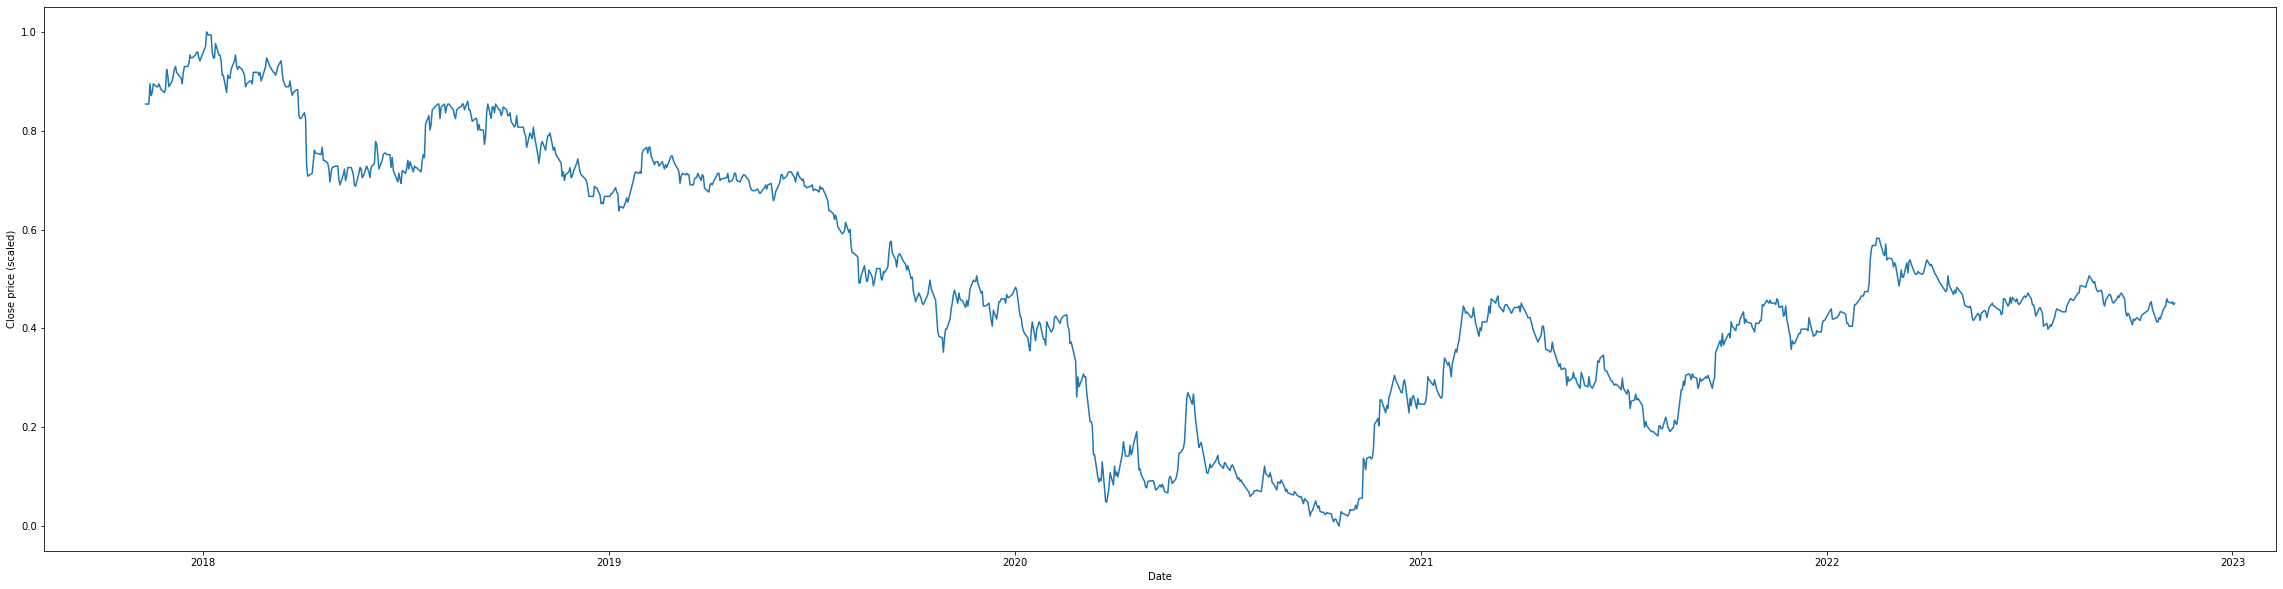

In [17]:
# Plotting "Close price" stock data after scaling.
# Now. the scale of close price are between 0 and 1.
plt.figure(figsize=(40,10))
sns.lineplot(x=df_closed_price['Date'], y=df_closed_price['Close price (scaled)'])

# 3) Parameter tuning on Model

ทำการแบ่งชุดข้อมูลสำหรับฝึกสอนและทดสอบโมเดล

In [18]:
# Split data into training set and test set.
# Training set = 0.85 (85%).
# Test set = 0.15 (15%).

n = len(df) * 0.15
n = round(n)
print("Test data =",n)

Test data = 182


กำหนดค่าพารามิเตอร์สำหรับเทคนิควิธีการทำเหมืองข้อมูล

*   **pattern** : จำนวนรูปแบบราคา
*   **window_size** : ขนาดรูปแบบราคา



In [19]:
# Define parameters value. 

pattern = [5, 10, 15, 20, 25, 30]  
window_size = [5, 6, 7, 8, 9, 10]  

In [20]:
# list of metrics

accuracy_list_pattern_1 = []
accuracy_list_pattern_2 = []
accuracy_list_pattern_3 = []
list_of_metric_1 = []
list_of_metric_2 = []
list_of_metric_3 = []

ทำการเทรนโมเดลการทำนายผลทั้งหมดด้วยค่าพารามิเตอร์ที่ได้กำหนดไว้

In [21]:
def predicting_stock_price_parameter_tuning(Days) :

      # Generate a Historical data from parameter 'n' (Amount of test set).
      df_closed_price_len = len(df_closed_price) - Days

      list_of_actual_price_trend = []
      list_of_predict_trend_probability_model = []
      list_of_predict_trend_naive_bayes_model = []
      list_of_predict_trend_decision_tree_model = []

      for i in range(Days) :

      #--------------------------------------------------------------------------------------------------------------------------
      #       Data Preprocesssing  
      #--------------------------------------------------------------------------------------------------------------------------

        df_historical = df_closed_price.iloc[:(df_closed_price_len+i),:]
        actual_price = df_closed_price.iloc[(df_closed_price_len+i),1]

        length = df_historical.shape[0]
        df_current = df_historical.iloc[length-w:length,[0,1,2]]
        df_current_volume = df.iloc[length-w:length,-1]
        df_current_list = list(df_current['Close price'])
        
        # MinMaxScaling process on current pattern list. 
        price_max = max(df_current_list)
        price_min = min(df_current_list)
        df_current_scaled = []
        for x in df_current_list :
          try :
            df_current_scaled.append( (x - price_min) / (price_max - price_min) )
          except ZeroDivisionError :
            df_current_scaled.append(0)

        # Historical data
        df_historical = df_historical.iloc[:df_historical.shape[0]-w,:]

        # Sliding a windows on Historical data.
        list_of_subsequence_original = []
        def sliding_window(elements, window_size):
          for i in range(len(elements)):
            list_of_subsequence_original.append(elements[i:i+window_size])
        sliding_window(list(df_historical['Close price']), w)

        list_of_subsequence_original_for_calculation = list_of_subsequence_original.copy()
        list_of_subsequence_original_for_calculation.append([df_current_list[0]])

        del list_of_subsequence_original[-(w-1):]

        # MinMaxScaling process on list of all subsequence.
        list_of_subsequence_scaled = []
        for i in range(len(list_of_subsequence_original)) :  
          price_max = max(list_of_subsequence_original[i])
          price_min = min(list_of_subsequence_original[i])      
          temp_list_scaled = []
          for x in list_of_subsequence_original[i] :
            try :
              temp_list_scaled.append( (x - price_min) / (price_max - price_min) )
            except ZeroDivisionError :
              temp_list_scaled.append(0)
          list_of_subsequence_scaled.append(temp_list_scaled)

        list_of_subsequence_scaled_with_index_1 = []
        i = 0
        for sub in list_of_subsequence_scaled :
          list_of_subsequence_scaled_with_index_1.append([i,sub])
          i = i + 1

      #--------------------------------------------------------------------------------------------------------------------------
      #       Similarity Distance Measures 
      #--------------------------------------------------------------------------------------------------------------------------

        list_of_subsequence_scaled_with_index = list_of_subsequence_scaled_with_index_1.copy()

        x = df_current_scaled
        index_list = []
        min_distance_list = []
        sub_list = []

        # Similarity Computation Process.
        for i in range(no_of_pattern) :

          list_of_distance_value = []

          for j in range(len(list_of_subsequence_scaled_with_index)) :
            y = list_of_subsequence_scaled_with_index[j][1]
            distance = dtw.distance(x, y)
            list_of_distance_value.append(distance)
          
          min_value = min(list_of_distance_value)

          index_list.append(list_of_subsequence_scaled_with_index[list_of_distance_value.index(min_value)][0])
          sub_list.append(list_of_subsequence_scaled_with_index[list_of_distance_value.index(min_value)][1])
          min_distance_list.append(min_value)

          del list_of_subsequence_scaled_with_index[list_of_distance_value.index(min_value)-w : list_of_distance_value.index(min_value)+w]

      #--------------------------------------------------------------------------------------------------------------------------
      #       Modeling 
      #--------------------------------------------------------------------------------------------------------------------------

        list_of_Price_Movement = []   

        all_movement = 0
        Trend_up = 0
        Trend_down = 0

        total_up_price = 0
        total_down_price = 0

        for i in index_list :

          all_movement = all_movement + 1

          a = list_of_subsequence_original_for_calculation[i][w-1]
          b = list_of_subsequence_original_for_calculation[i+w][0]
          
          if a > b :
            Trend_down = Trend_down + 1
            total_down_price = total_down_price + (b-a)
            list_of_Price_Movement.append(-1)
          elif a <= b :
            Trend_up = Trend_up + 1
            total_up_price = total_up_price + (b-a)
            list_of_Price_Movement.append(1)

        prob_of_trend_up = Trend_up / all_movement
        prob_of_trend_down = Trend_down / all_movement
        
        # Expectation 
        list_of_similarity_distance = min_distance_list
    
        list_of_probability_of_similar_pattern = []
        for i in list_of_similarity_distance :
            try :
              list_of_probability_of_similar_pattern.append(i/sum(list_of_similarity_distance))
            except ZeroDivisionError :
              list_of_probability_of_similar_pattern.append(0)

        list_of_computation = []

        for i in range(all_movement)  :
          list_of_computation.append((list_of_Price_Movement[i] * list_of_probability_of_similar_pattern[i]))

        Expected_value = sum(list_of_computation)

        # Variance 
        list_of_variance_computation = []

        for i in range(all_movement) :
          list_of_variance_computation.append( ((list_of_Price_Movement[i] - Expected_value)**2) * list_of_probability_of_similar_pattern[i] )

        std = sum(list_of_variance_computation)

      #--------------------------------------------------------------------------------------------------------------------------
      #       Probability Model 
      #--------------------------------------------------------------------------------------------------------------------------

        actual = 0
        if df_current_list[-1] <= actual_price :
          actual = 1
        elif df_current_list[-1] > actual_price :
          actual = -1
        
        list_of_actual_price_trend.append(actual)

        trend = 0
        predict = 0
        if (prob_of_trend_up > prob_of_trend_down) :
          predict = 1
          trend = prob_of_trend_up
        elif (prob_of_trend_down > prob_of_trend_up) :
          predict = -1
          trend = prob_of_trend_down
        else :
          if Expected_value >= 0 : 
            predict = 1
            trend = prob_of_trend_up
          else : 
            predict = -1
            trend = prob_of_trend_down
        
        list_of_predict_trend_probability_model.append(predict)

        #--------------------------------------------------------------------------------------------------------------------------
        # Naive Bayes Classifier Model 
        #--------------------------------------------------------------------------------------------------------------------------

        df_volume_list = []
        for i in index_list :
          df_volume_list.append(list(df.iloc[i:i+w,-1]))
    
        d1 = pd.DataFrame(df_volume_list)
        d1['Price Movement'] = list_of_Price_Movement

        x = d1.iloc[:,0:w]
        y = d1['Price Movement']

        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)
        df_current_volume_scaled = scaler.transform([df_current_volume])

        GNB = GaussianNB()
        model = GNB.fit(x_scaled, y)

        Y_predict = model.predict(df_current_volume_scaled)

        list_of_predict_trend_naive_bayes_model.append(Y_predict[0])

        #--------------------------------------------------------------------------------------------------------------------------
        # Decision Tree Classifier Model 
        #--------------------------------------------------------------------------------------------------------------------------

        d2 = pd.DataFrame(df_volume_list)
        d2['Price Movement'] = list_of_Price_Movement

        x = d2.iloc[:,0:w]
        y = d2['Price Movement']

        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)
        df_current_volume_scaled = scaler.transform([df_current_volume])

        tree = DecisionTreeClassifier(random_state=0)
        model = tree.fit(x_scaled, y)

        Y_predict = model.predict(df_current_volume_scaled)

        list_of_predict_trend_decision_tree_model.append(Y_predict[0])

      y_true = list_of_actual_price_trend

      y_predict_probability = list_of_predict_trend_probability_model
      y_predict_naivebayes = list_of_predict_trend_naive_bayes_model
      y_predict_tree = list_of_predict_trend_decision_tree_model

      accuracy_probability = accuracy_score(list_of_actual_price_trend, list_of_predict_trend_probability_model)      
      accuracy_naivebayes = accuracy_score(list_of_actual_price_trend, list_of_predict_trend_naive_bayes_model)       
      accuracy_tree = accuracy_score(list_of_actual_price_trend, list_of_predict_trend_decision_tree_model)         
      
      print('Pattern =',no_of_pattern,', Window size =',w,'| Statistical Analysis =',"{:.4f}".format(accuracy_probability),'| Naive Bayes Classifier =',"{:.4f}".format(accuracy_naivebayes),'| Decision Tree Classifier =',"{:.4f}".format(accuracy_tree))
      
      accuracy_list_window1.append(accuracy_probability)
      accuracy_list_window2.append(accuracy_naivebayes)
      accuracy_list_window3.append(accuracy_tree)

      list_of_metric_1.append(precision_recall_fscore_support(y_true, y_predict_probability, labels=[-1 ,1]))
      list_of_metric_2.append(precision_recall_fscore_support(y_true, y_predict_naivebayes, labels=[-1 ,1]))
      list_of_metric_3.append(precision_recall_fscore_support(y_true, y_predict_tree, labels=[-1 ,1]))

ทำการค้นหาค่าพารามิเตอร์ในแต่ละโมเดลที่มีประสิทธิภาพความแม่นยำสูงที่สุดด้วยค่า (Accuracy score)

In [22]:
# Searching the best parameter on data mining technique.

for no_of_pattern in pattern :
  
  accuracy_list_window1 = []
  accuracy_list_window2 = []
  accuracy_list_window3 = []
                                
  for w in window_size :  
    predicting_stock_price_parameter_tuning(n)         
                  
  accuracy_list_pattern_1.append(accuracy_list_window1)    
  accuracy_list_pattern_2.append(accuracy_list_window2)
  accuracy_list_pattern_3.append(accuracy_list_window3)

Pattern = 5 , Window size = 5 | Statistical Analysis = 0.4780 | Naive Bayes Classifier = 0.4945 | Decision Tree Classifier = 0.5165
Pattern = 5 , Window size = 6 | Statistical Analysis = 0.4890 | Naive Bayes Classifier = 0.5769 | Decision Tree Classifier = 0.6044
Pattern = 5 , Window size = 7 | Statistical Analysis = 0.5220 | Naive Bayes Classifier = 0.4890 | Decision Tree Classifier = 0.4835
Pattern = 5 , Window size = 8 | Statistical Analysis = 0.5055 | Naive Bayes Classifier = 0.5055 | Decision Tree Classifier = 0.4890
Pattern = 5 , Window size = 9 | Statistical Analysis = 0.5549 | Naive Bayes Classifier = 0.5549 | Decision Tree Classifier = 0.5549
Pattern = 5 , Window size = 10 | Statistical Analysis = 0.4835 | Naive Bayes Classifier = 0.5110 | Decision Tree Classifier = 0.4890
Pattern = 10 , Window size = 5 | Statistical Analysis = 0.5110 | Naive Bayes Classifier = 0.4945 | Decision Tree Classifier = 0.4725
Pattern = 10 , Window size = 6 | Statistical Analysis = 0.5165 | Naive Bay

# 4) Model Evaluation

ทำการเปรียบเทียบประสิทธิภาพของโมเดลที่ทำการศึกษาหลังจากปรับค่าพารามิเตอร์ที่กำหนด

## 4.1) วิธีการวิเคราะห์ทางสถิติ (Statistical Analysis)

กราฟ Heatmap แสดงค่า Accuracy ระหว่างค่าพารามิเตอร์ w และ no_of_pattern

In [23]:
# Create a dataframe contain accuracy list
accuracy_table1 = pd.DataFrame(accuracy_list_pattern_1)
accuracy_table1.columns = window_size
accuracy_table1.index = pattern

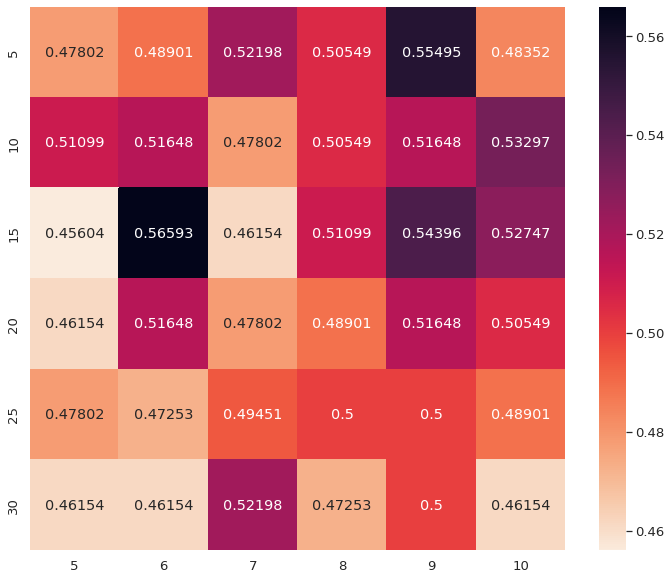

In [24]:
# Plotting accuracy heatmap 
plt.figure(figsize=(12,10))
sns.set(font_scale=1.2)
sns.heatmap(accuracy_table1, annot=True, fmt='.5g', cbar=True, cmap='rocket_r')

In [25]:
# create a list contain precision scores.
list_of_metric_copy = list_of_metric_1.copy()
p_list = []

for i in range(len(pattern)) :
  temp_list = []
  for j in range(len(window_size)) :
    temp_list.append(list_of_metric_copy[j][0][1])
  del list_of_metric_copy[0:len(window_size)]
  p_list.append(temp_list)

In [26]:
# Create a dataframe contain precision list
precision_table1 = pd.DataFrame(p_list)
precision_table1.columns = window_size
precision_table1.index = pattern

กราฟ Heatmap แสดงค่า Precision ระหว่างค่าพารามิเตอร์ w และ no_of_pattern

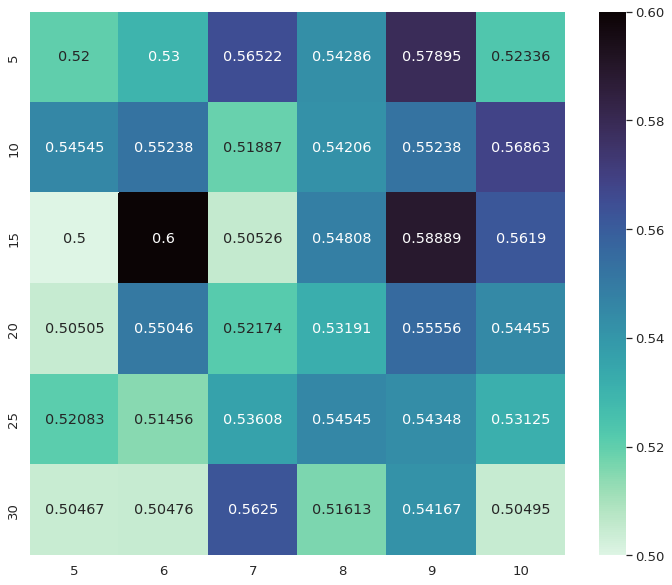

In [27]:
# Plotting precision heatmap
plt.figure(figsize = (12,10))
sns.set(font_scale=1.2)
sns.heatmap(precision_table1, annot=True, fmt='.5g', cbar=True, cmap='mako_r')

แสดงคะแนนการวัดประสิทธิภาพทั้งหมดบนค่าพารามิเตอร์ที่ให้ผลดีที่สุด (Accuracy, Precision, Recall, F1)

In [28]:
# create a dataframe contain the best evaluation scores on statistical analysis.
max_value = 0
index_i = 0
index_j = 0
for i in range(len(pattern)) :
  for j in range(len(window_size)) :
    if accuracy_list_pattern_1[i][j] > max_value :
      max_value = accuracy_list_pattern_1[i][j]
      index_i = i
      index_j = j

metric1_list = [accuracy_list_pattern_1[index_i][index_j], list_of_metric_1[(index_i*6)+index_j][0][1], list_of_metric_1[(index_i*6)+index_j][1][1], list_of_metric_1[(index_i*6)+index_j][2][1]]
metrics1 = pd.DataFrame(metric1_list)
metrics1 = metrics1.transpose()
metrics1.columns = ['Accuracy','Precision','Recall','F1-score']
metrics1.rename(index={0:'Statistical Analysis'}, inplace=True)
metrics1

,Accuracy,Precision,Recall,F1-score
Statistical Analysis,0.565934,0.6,0.606061,0.603015


## 4.2) วิธีจำแนกแบบเบย์อย่างง่าย (Naive Bayes Classifier)

กราฟ Heatmap แสดงค่า Accuracy ระหว่างค่าพารามิเตอร์ w และ no_of_pattern

In [29]:
# Create a dataframe contain accuracy list
accuracy_table2 = pd.DataFrame(accuracy_list_pattern_2)
accuracy_table2.columns = window_size
accuracy_table2.index = pattern

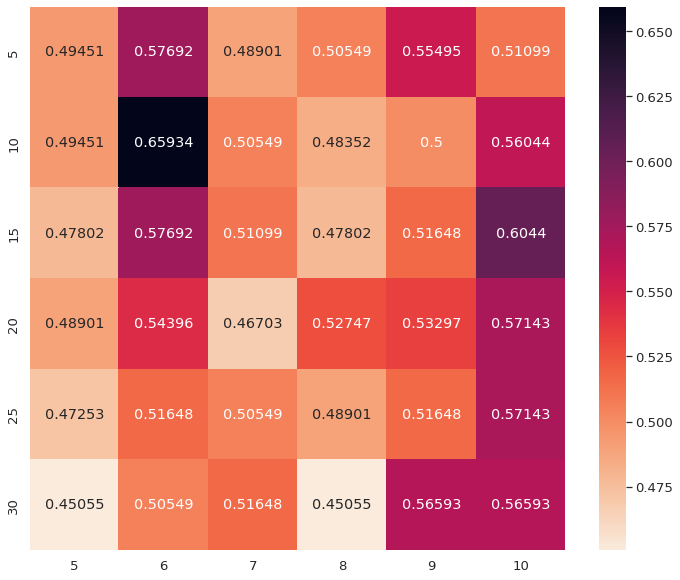

In [30]:
# Plotting Accuracy heatmap
plt.figure(figsize=(12,10))
sns.set(font_scale=1.2)
sns.heatmap(accuracy_table2, annot=True, fmt='.5g', cbar=True, cmap='rocket_r')

In [31]:
# create a list contain precision scores.
list_of_metric_copy = list_of_metric_2.copy()
p_list = []

for i in range(len(pattern)) :
  temp_list = []
  for j in range(len(window_size)) :
    temp_list.append(list_of_metric_copy[j][0][1])
  del list_of_metric_copy[0:len(window_size)]
  p_list.append(temp_list)

In [32]:
# Create a dataframe contain precision list
precision_table2 = pd.DataFrame(p_list)
precision_table2.columns = window_size
precision_table2.index = pattern

กราฟ Heatmap แสดงค่า Precision ระหว่างค่าพารามิเตอร์ w และ no_of_pattern

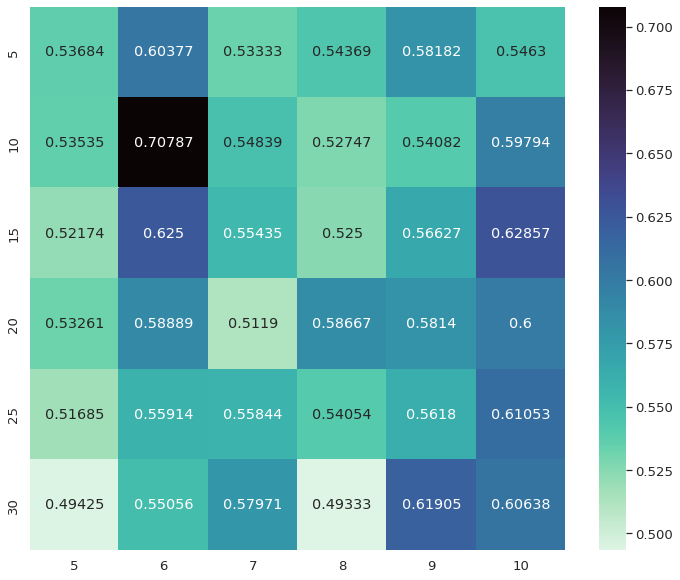

In [33]:
# Plotting precision heatmap
plt.figure(figsize = (12,10))
sns.set(font_scale=1.2)
sns.heatmap(precision_table2, annot=True, fmt='.5g', cbar=True, cmap='mako_r')

แสดงคะแนนการวัดประสิทธิภาพทั้งหมดบนค่าพารามิเตอร์ที่ให้ผลดีที่สุด (Accuracy, Precision, Recall, F1)

In [34]:
# create a dataframe contain the best evaluation scores on naive bayes classifier.
max_value = 0
index_i = 0
index_j = 0
for i in range(len(pattern)) :
  for j in range(len(window_size)) :
    if accuracy_list_pattern_2[i][j] > max_value :
      max_value = accuracy_list_pattern_2[i][j]
      index_i = i
      index_j = j

metric2_list = [accuracy_list_pattern_2[index_i][index_j], list_of_metric_2[(index_i*6)+index_j][0][1], list_of_metric_2[(index_i*6)+index_j][1][1], list_of_metric_2[(index_i*6)+index_j][2][1]]
metrics2 = pd.DataFrame(metric2_list)
metrics2 = metrics2.transpose()
metrics2.columns = ['Accuracy','Precision','Recall','F1-score']
metrics2.rename(index={0:'Naive Bayes Classifier'}, inplace=True)
metrics2

,Accuracy,Precision,Recall,F1-score
Naive Bayes Classifier,0.659341,0.707865,0.636364,0.670213


## 4.3) วิธีจำแนกต้นไม้การตัดสินใจ (Decision Tree Classifier)

กราฟ Heatmap แสดงค่า Accuracy ระหว่างค่าพารามิเตอร์ w และ no_of_pattern

In [35]:
# Create a dataframe contain accuracy list
accuracy_table3 = pd.DataFrame(accuracy_list_pattern_3)
accuracy_table3.columns = window_size
accuracy_table3.index = pattern

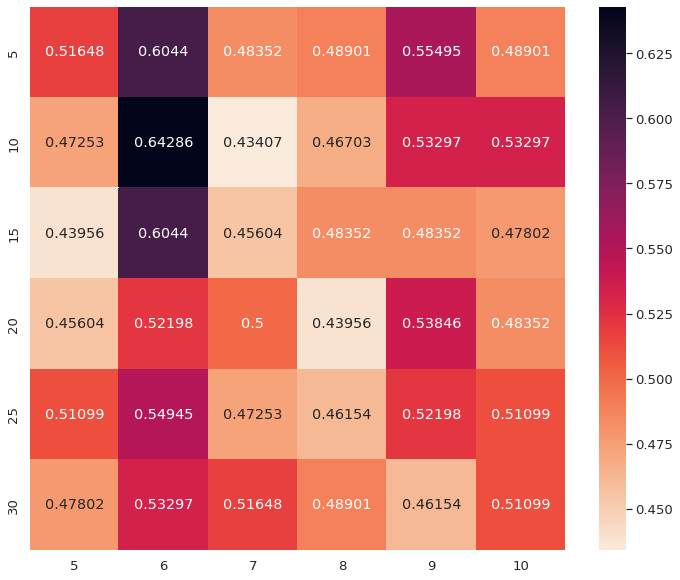

In [36]:
# Plotting Accuracy heatmap 
plt.figure(figsize=(12,10))
sns.set(font_scale=1.2)
sns.heatmap(accuracy_table3, annot=True, fmt='.5g', cbar=True, cmap='rocket_r')

In [37]:
# create a list contain precision scores.
list_of_metric_copy = list_of_metric_3.copy()
p_list = []

for i in range(len(pattern)) :
  temp_list = []
  for j in range(len(window_size)) :
    temp_list.append(list_of_metric_copy[j][0][1])
  del list_of_metric_copy[0:len(window_size)]
  p_list.append(temp_list)

In [38]:
# Create a dataframe contain precision list
precision_table3 = pd.DataFrame(p_list)
precision_table3.columns = window_size
precision_table3.index = pattern

กราฟ Heatmap แสดงค่า Precision ระหว่างค่าพารามิเตอร์ w และ no_of_pattern

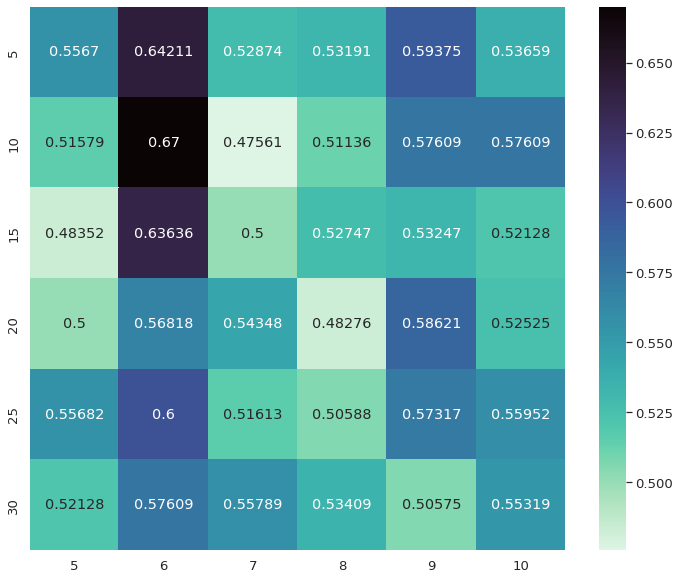

In [39]:
# Plotting precision heatmap
plt.figure(figsize = (12,10))
sns.set(font_scale=1.2)
sns.heatmap(precision_table3, annot=True, fmt='.5g', cbar=True, cmap='mako_r')

แสดงคะแนนการวัดประสิทธิภาพทั้งหมดบนค่าพารามิเตอร์ที่ให้ผลดีที่สุด (Accuracy, Precision, Recall, F1)

In [40]:
# create a dataframe contain the best evaluation scores on decision tree classifier.
max_value = 0
index_i = 0
index_j = 0
for i in range(len(pattern)) :
  for j in range(len(window_size)) :
    if accuracy_list_pattern_3[i][j] > max_value :
      max_value = accuracy_list_pattern_3[i][j]
      index_i = i
      index_j = j

metric3_list = [accuracy_list_pattern_3[index_i][index_j], list_of_metric_3[(index_i*6)+index_j][0][1], list_of_metric_3[(index_i*6)+index_j][1][1], list_of_metric_3[(index_i*6)+index_j][2][1]]
metrics3 = pd.DataFrame(metric3_list)
metrics3 = metrics3.transpose()
metrics3.columns = ['Accuracy','Precision','Recall','F1-score']
metrics3

,Accuracy,Precision,Recall,F1-score
0,0.642857,0.67,0.676768,0.673367


## 4.4) Model Performance Comparison

เปรียบผลการวัดประสิทธิภาพของโมเดลการทำนายแนวโน้ม

In [41]:
# Combining evaluation score from all models.
metrics_list = [metric1_list, metric2_list, metric3_list]
metrics = pd.DataFrame(metrics_list)
metrics.columns = ['Accuracy','Precision','Recall','F1-score']
metrics.index = ['Statistical Analysis','Naive Bayes Classifier','Decision Tree Classifier']
metrics

,Accuracy,Precision,Recall,F1-score
Statistical Analysis,0.565934,0.600000,0.606061,0.603015
Naive Bayes Classifier,0.659341,0.707865,0.636364,0.670213
Decision Tree Classifier,0.642857,0.670000,0.676768,0.673367


In [42]:
# evaluation score list.
model_list = list(metrics.index)
accuracy = [metrics.iloc[0,0], metrics.iloc[1,0], metrics.iloc[2,0]]
precision = [metrics.iloc[0,1], metrics.iloc[1,1], metrics.iloc[2,1]]
recall = [metrics.iloc[0,2], metrics.iloc[1,2], metrics.iloc[2,2]]
fscore = [metrics.iloc[0,3], metrics.iloc[1,3], metrics.iloc[2,3]]

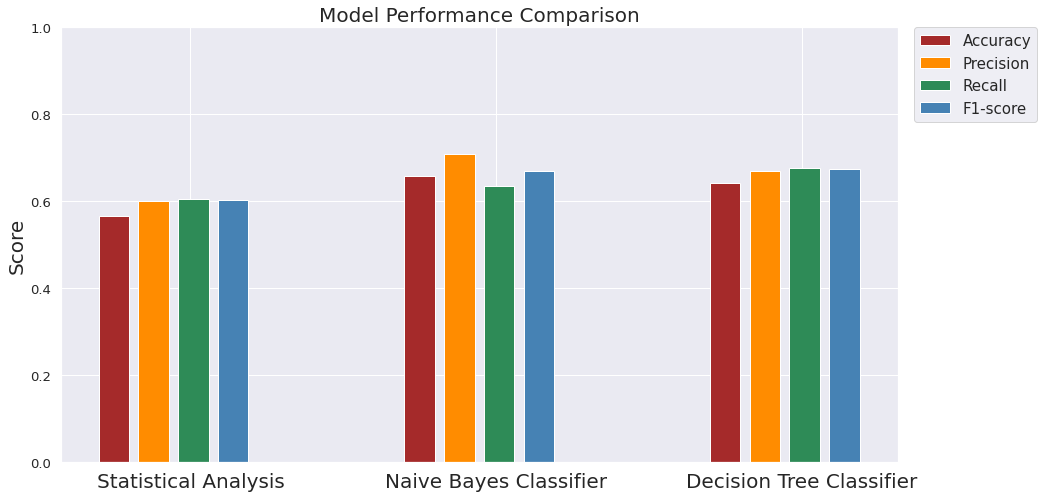

In [43]:
# Plotting chart.
# Comparing the performance of models.

plt.figure(figsize=(15,8))

x_axis = np.arange(len(model_list))

plt.bar(x_axis -0.25, accuracy, width=0.1, label = 'Accuracy', color='brown')
plt.bar(x_axis -0.12, precision, width=0.1, label = 'Precision', color='darkorange')
plt.bar(x_axis +0.01, recall, width=0.1, label = 'Recall', color='seagreen')
plt.bar(x_axis +0.14, fscore, width=0.1, label = 'F1-score', color='steelblue')

plt.xticks(x_axis,model_list,fontsize=20)
plt.ylim(0,1)
plt.ylabel('Score',fontsize=20)

plt.title('Model Performance Comparison',fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 15})
plt.style.use('ggplot')